<a href="https://colab.research.google.com/github/FavourFibbs/Stock-Price-prediction/blob/main/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all the required libraries

! pip install yfinance

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf


In [2]:

# Define start day to fetch the dataset from the yahoo finance library
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714724,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716957,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


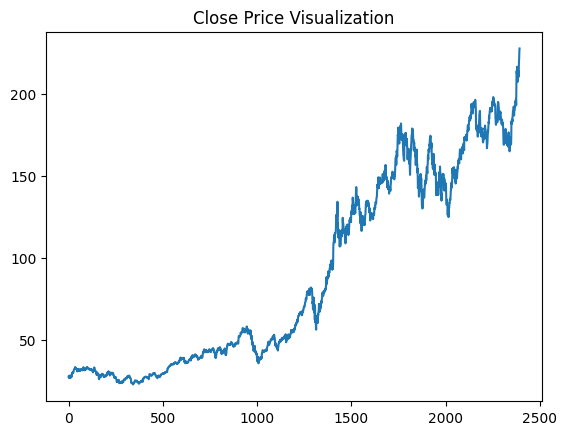

In [5]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2388,212.089996,217.509995,211.919998,216.750000,60402900
2389,216.149994,220.380005,215.100006,220.270004,58046200
2390,220.000000,221.550003,219.029999,221.550003,37369800
2391,221.649994,226.449997,221.649994,226.339996,60412400


In [7]:
# Plotting moving averages of 100 day

ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2388    183.6509
2389    183.9595
2390    184.2918
2391    184.6667
2392    185.0734
Name: Close, Length: 2393, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

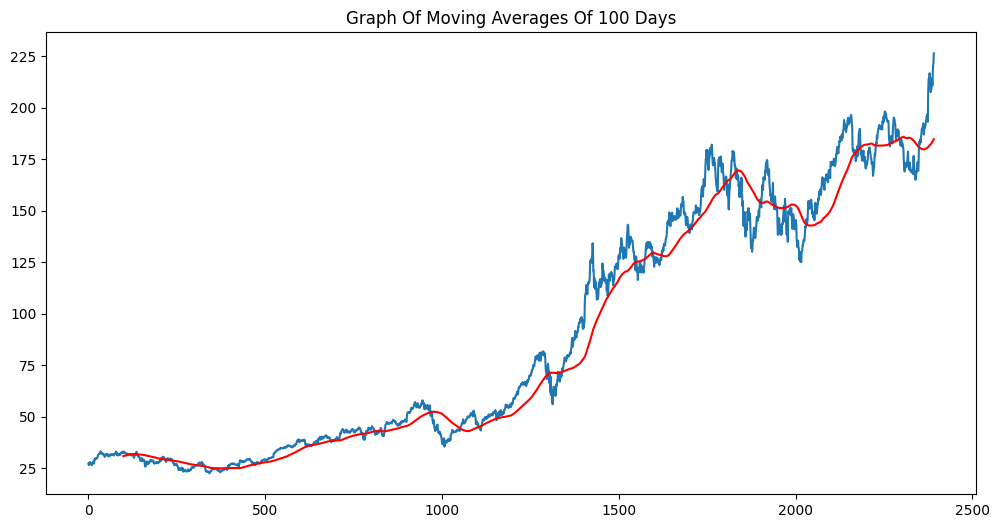

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

In [8]:
# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2388    183.90855
2389    184.13120
2390    184.36390
2391    184.60575
2392    184.84950
Name: Close, Length: 2393, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

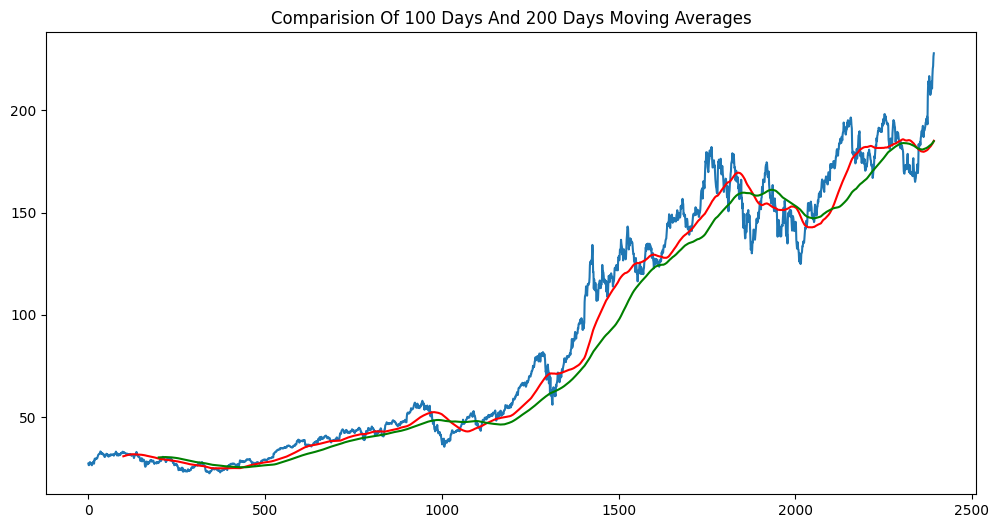

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(2392, 5)

In [10]:
# Spliting the dataset into training (70%) and testing (30%) set
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1675, 7)
(718, 7)


In [11]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714724,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716957,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000


In [12]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1675,2021-08-27,147.479996,148.750000,146.830002,148.600006,146.321808,55802400
1676,2021-08-30,149.000000,153.490005,148.610001,153.119995,150.772476,90956700
1677,2021-08-31,152.660004,152.800003,151.289993,151.830002,149.502243,86453100
1678,2021-09-01,152.830002,154.979996,152.339996,152.509995,150.171829,80313700
1679,2021-09-02,153.869995,154.720001,152.399994,153.649994,151.294342,71115500


In [13]:
# Using MinMax scaler for normalization of the dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [16]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03693548],
       [0.03094489],
       [0.03096434],
       ...,
       [0.98833003],
       [0.97852729],
       [0.97214765]])

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(1575, 100, 1)

In [19]:
# ML Model (LSTM)

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
# Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
50/50 [==============================] - 32s 479ms/step - loss: 0.0313 - mean_absolute_error: 0.1130
Epoch 2/100
50/50 [==============================] - 24s 483ms/step - loss: 0.0065 - mean_absolute_error: 0.0517
Epoch 3/100
50/50 [==============================] - 24s 481ms/step - loss: 0.0063 - mean_absolute_error: 0.0508
Epoch 4/100
50/50 [==============================] - 23s 469ms/step - loss: 0.0044 - mean_absolute_error: 0.0423
Epoch 5/100
50/50 [==============================] - 23s 452ms/step - loss: 0.0045 - mean_absolute_error: 0.0420
Epoch 6/100
50/50 [==============================] - 24s 485ms/step - loss: 0.0052 - mean_absolute_error: 0.0449
Epoch 7/100
50/50 [==============================] - 25s 491ms/step - loss: 0.0044 - mean_absolute_error: 0.0417
Epoch 8/100
50/50 [==============================] - 24s 482ms/step - loss: 0.0047 - mean_absolute_error: 0.0437
Epoch 9/100
50/50 [==============================] - 24s 480ms/step - loss: 0.0042 - mean_absolu

In [24]:
model.save('keras_model.h5')

In [25]:

test_close.shape
test_close

array([[148.6000061 ],
       [153.11999512],
       [151.83000183],
       [152.50999451],
       [153.6499939 ],
       [154.30000305],
       [156.69000244],
       [155.11000061],
       [154.07000732],
       [148.97000122],
       [149.55000305],
       [148.11999512],
       [149.02999878],
       [148.78999329],
       [146.05999756],
       [142.94000244],
       [143.42999268],
       [145.8500061 ],
       [146.83000183],
       [146.91999817],
       [145.36999512],
       [141.91000366],
       [142.83000183],
       [141.5       ],
       [142.6499939 ],
       [139.13999939],
       [141.11000061],
       [142.        ],
       [143.28999329],
       [142.8999939 ],
       [142.80999756],
       [141.50999451],
       [140.91000366],
       [143.75999451],
       [144.83999634],
       [146.55000305],
       [148.75999451],
       [149.25999451],
       [149.47999573],
       [148.69000244],
       [148.63999939],
       [149.32000732],
       [148.8500061 ],
       [152

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

In [28]:
#Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [29]:
final_df.head()

,0
0,127.900002
1,130.360001
2,133.000000
3,131.240005
4,134.429993


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04883393],
       [0.07225134],
       [0.09738222],
       [0.08062835],
       [0.11099472],
       [0.08814851],
       [0.11166113],
       [0.10842462],
       [0.11489765],
       [0.09842935],
       [0.10214186],
       [0.08729181],
       [0.10994773],
       [0.11375539],
       [0.11061401],
       [0.10290342],
       [0.10195143],
       [0.0827226 ],
       [0.09300329],
       [0.04835794],
       [0.05073783],
       [0.06634943],
       [0.07082351],
       [0.03883866],
       [0.02989059],
       [0.        ],
       [0.02094245],
       [0.04455021],
       [0.03331746],
       [0.01980011],
       [0.01827706],
       [0.04321752],
       [0.02532131],
       [0.04121848],
       [0.03931465],
       [0.03883866],
       [0.0238934 ],
       [0.0175155 ],
       [0.01437413],
       [0.02179915],
       [0.00732988],
       [0.02970017],
       [0.02979538],
       [0.03779154],
       [0.04150405],
       [0.03179442],
       [0.0435983 ],
       [0.073

In [31]:
input_data.shape

(818, 1)

In [32]:
# Testing the model
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(718, 100, 1)
(718,)


In [34]:
# Making predictions
# Making prediction and plotting the graph of predicted vs actual values
y_pred = model.predict(x_test)

23/23 [==============================] - 2s 58ms/step


In [35]:
y_pred.shape

(718, 1)

In [36]:
y_test

array([0.24588298, 0.28891   , 0.2766302 , 0.28310324, 0.2939552 ,
       0.30014282, 0.32289388, 0.30785341, 0.29795343, 0.24940506,
       0.25492626, 0.24131362, 0.2499762 , 0.24769152, 0.22170394,
       0.19200384, 0.1966682 , 0.21970497, 0.22903382, 0.22989052,
       0.21513561, 0.182199  , 0.19095672, 0.17829606, 0.18924317,
       0.15583057, 0.17458355, 0.1830557 , 0.1953355 , 0.19162299,
       0.19076629, 0.1783912 , 0.17267973, 0.19980957, 0.21009041,
       0.22636843, 0.24740595, 0.25216559, 0.25425984, 0.24673968,
       0.24626369, 0.25273687, 0.2482628 , 0.28367451, 0.25730608,
       0.24930992, 0.25940033, 0.27339368, 0.26834847, 0.27139457,
       0.26339841, 0.2669205 , 0.2394098 , 0.2389338 , 0.25911477,
       0.25920991, 0.26872918, 0.29243223, 0.33412656, 0.35963829,
       0.36411236, 0.36782487, 0.37287008, 0.32403615, 0.35668734,
       0.40485485, 0.39980965, 0.39019509, 0.37191809, 0.40504528,
       0.46082809, 0.49795335, 0.49300329, 0.53955254, 0.50423

In [37]:
y_pred

array([[0.25092766],
       [0.25016645],
       [0.24961938],
       [0.24968131],
       [0.25054532],
       [0.25233334],
       [0.25530016],
       [0.25992793],
       [0.2662855 ],
       [0.27367854],
       [0.28064105],
       [0.28599113],
       [0.28858528],
       [0.28783628],
       [0.28418857],
       [0.27845713],
       [0.27157366],
       [0.26417038],
       [0.25661504],
       [0.2494903 ],
       [0.24298853],
       [0.23711355],
       [0.2318052 ],
       [0.22707921],
       [0.22287582],
       [0.2191713 ],
       [0.21573228],
       [0.21253769],
       [0.20976888],
       [0.20766637],
       [0.20638618],
       [0.2059798 ],
       [0.20640233],
       [0.2074413 ],
       [0.20900875],
       [0.21099779],
       [0.21354805],
       [0.21680783],
       [0.22061458],
       [0.22484429],
       [0.22993194],
       [0.23561426],
       [0.24147362],
       [0.2470483 ],
       [0.25228295],
       [0.2569266 ],
       [0.26051903],
       [0.262

In [38]:
scaler.scale_

array([0.00951928])

In [39]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

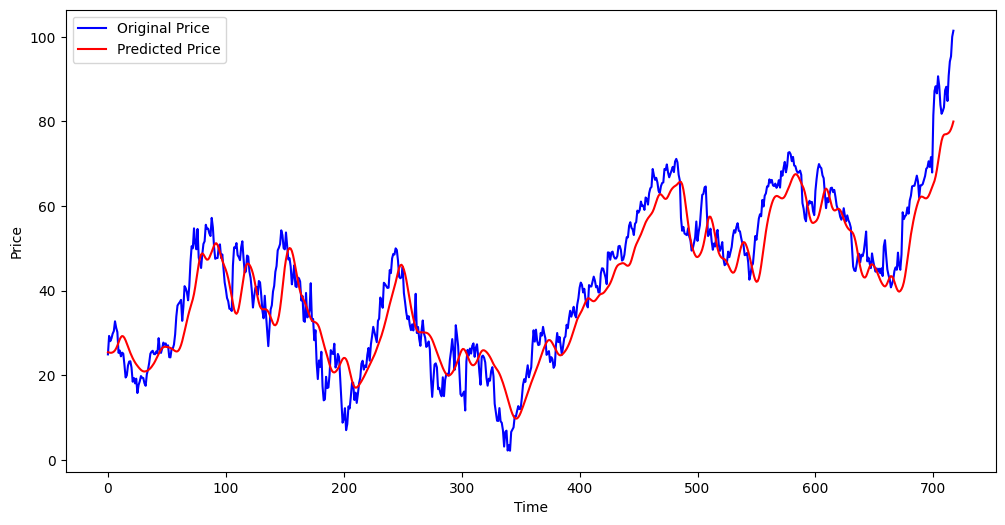

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
# Model evaluation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.215266866529846
